### Import libraries

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load dataset 

In [3]:
!wget --no-check-certificate \
      https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
      -O /tmp/messy_vs_clean_room.zip

--2023-09-13 11:52:17--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 64:ff9b::cdb9:d80a, 64:ff9b::cdb9:d82a, 205.185.216.42, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|64:ff9b::cdb9:d80a|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  1.51MB/s    in 19s     

2023-09-13 11:52:37 (3.45 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [7]:
base_dir = './images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

### Image augmentation

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, rotation_range=20, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=4, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=4, class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### CNN Modelling

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-09-13 13:16:55.553630: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2023-09-13 13:16:55.571557: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2023-09-13 13:16:55.589829: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### Compile the Model

In [11]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

### Train the Model

In [12]:
model.fit(train_generator, steps_per_epoch=25, epochs=20, validation_data=validation_generator, validation_steps=5, verbose=2)

Epoch 1/20


2023-09-13 13:18:29.564346: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2023-09-13 13:18:29.575347: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.


25/25 - 10s - loss: 0.8125 - accuracy: 0.4100 - val_loss: 0.6926 - val_accuracy: 0.5000 - 10s/epoch - 384ms/step
Epoch 2/20
25/25 - 9s - loss: 0.6944 - accuracy: 0.4700 - val_loss: 0.6930 - val_accuracy: 0.5000 - 9s/epoch - 345ms/step
Epoch 3/20
25/25 - 8s - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5000 - 8s/epoch - 328ms/step
Epoch 4/20
25/25 - 9s - loss: 0.7026 - accuracy: 0.4800 - val_loss: 0.6925 - val_accuracy: 0.8000 - 9s/epoch - 354ms/step
Epoch 5/20
25/25 - 9s - loss: 0.6924 - accuracy: 0.5300 - val_loss: 0.6850 - val_accuracy: 0.5000 - 9s/epoch - 352ms/step
Epoch 6/20
25/25 - 8s - loss: 0.6725 - accuracy: 0.5600 - val_loss: 0.6307 - val_accuracy: 0.5500 - 8s/epoch - 325ms/step
Epoch 7/20
25/25 - 8s - loss: 0.6795 - accuracy: 0.4800 - val_loss: 0.7023 - val_accuracy: 0.5000 - 8s/epoch - 322ms/step
Epoch 8/20
25/25 - 8s - loss: 0.6976 - accuracy: 0.4900 - val_loss: 0.6933 - val_accuracy: 0.5000 - 8s/epoch - 334ms/step
Epoch 9/20
25/25 - 8s - loss: 0.6

### Testing

1/1 [==============================] - 0s 24ms/step
clean


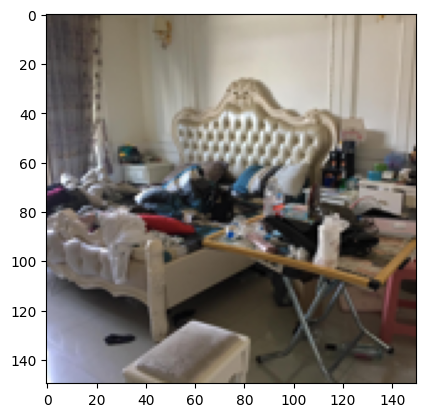

In [27]:
path = './images/val/messy/1.png'
img = Image.open(path)
img = img.resize((150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0][0] < 0.5:
    print('clean')
else:
    print('messy')